In [4]:
# Imports and settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import train_test_split
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.naive_bayes import GaussianNB

In [3]:
corona_df = pd.read_csv('qt_dataset.csv')
corona_df

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98.0,65.0,95.0,Negative
1,1,96.0,92.0,95.0,Negative
2,2,95.0,92.0,99.0,Negative
3,3,97.0,56.0,96.0,Negative
4,4,88.0,94.0,98.0,Positive
...,...,...,...,...,...
9997,9997,99.0,56.0,105.0,Negative
9998,9998,92.0,49.0,98.0,Positive
9999,9999,85.0,52.0,99.0,Positive
10000,NaN,NaN,NaN,NaN,NaN


In [5]:
corona_df.keys()

Index(['ID', 'Oxygen', 'PulseRate', 'Temperature', 'Result'], dtype='object')

In [7]:
# Gathering information about the dataset
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10001 non-null  object 
 1   Oxygen       10000 non-null  float64
 2   PulseRate    10000 non-null  float64
 3   Temperature  10000 non-null  float64
 4   Result       10000 non-null  object 
dtypes: float64(3), object(2)
memory usage: 390.8+ KB


In [9]:
corona_df.describe()

,Oxygen,PulseRate,Temperature
count,10000.000000,10000.000000,10000.000000
mean,92.548900,84.976600,100.000700
std,4.611197,26.305841,3.185045
min,85.000000,40.000000,95.000000
25%,88.000000,63.000000,97.000000
50%,93.000000,85.000000,100.000000
75%,97.000000,108.000000,103.000000
max,100.000000,130.000000,105.000000


In [10]:
corona_df.isnull()

,ID,Oxygen,PulseRate,Temperature,Result
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9997,False,False,False,False,False
9998,False,False,False,False,False
9999,False,False,False,False,False
10000,True,True,True,True,True


In [12]:
# deleting the empty rows 
corona_df = corona_df.dropna()
corona_df.drop_duplicates(inplace=True)
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10000 non-null  object 
 1   Oxygen       10000 non-null  float64
 2   PulseRate    10000 non-null  float64
 3   Temperature  10000 non-null  float64
 4   Result       10000 non-null  object 
dtypes: float64(3), object(2)
memory usage: 468.8+ KB


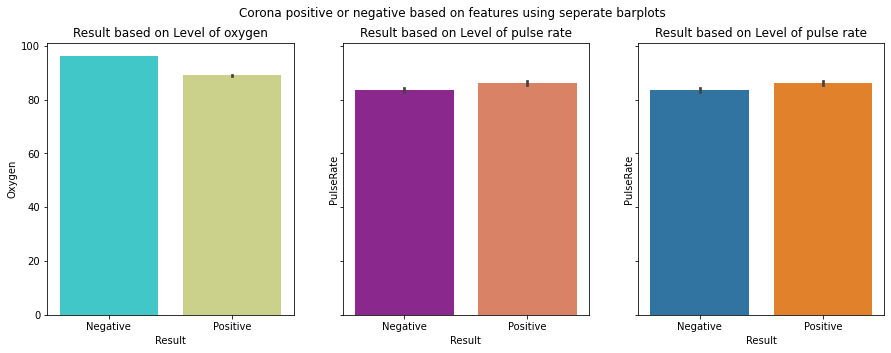

In [13]:
# Barplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

fig.suptitle("Corona positive or negative based on features using seperate barplots")

axes[0].set_title("Result based on Level of oxygen")
axes[1].set_title("Result based on Level of pulse rate")
axes[2].set_title("Result based on Level of pulse rate")

sns.barplot(ax=axes[0], x='Result', y='Oxygen', data=corona_df, palette='rainbow')
sns.barplot(ax=axes[1], x='Result', y='PulseRate', data=corona_df, palette='plasma')
sns.barplot(ax=axes[2], x='Result', y='PulseRate', data=corona_df)
plt.show()

In [14]:
# seperationg features and results
features_df = corona_df[['Oxygen', 'PulseRate', 'Temperature']]
X = np.array(features_df)
y = np.array(corona_df['Result'])

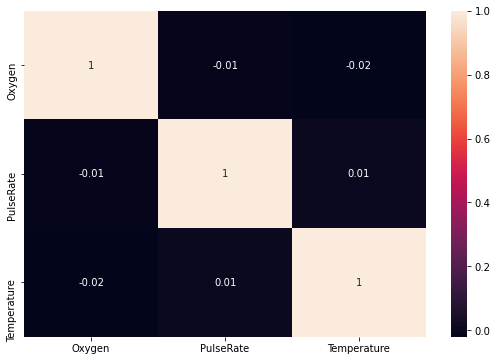

In [16]:
# corr() to calculate the correlation between variables
correlation_matrix = corona_df.corr().round(2)
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

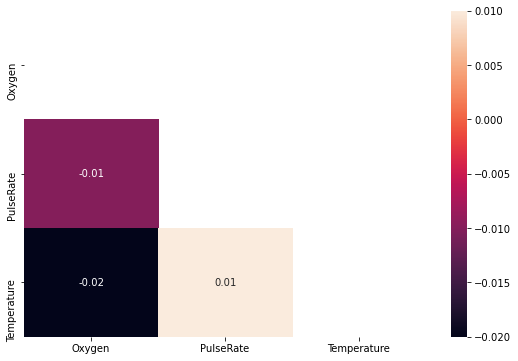

In [17]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

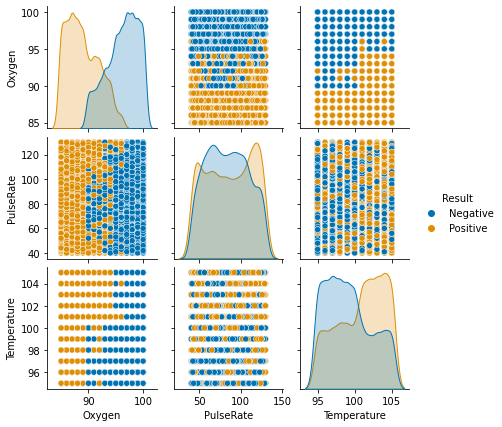

In [20]:
# let's create pairplot to visualise the data for each pair of attributes
sns.pairplot(corona_df, hue="Result", height = 2, palette = 'colorblind');

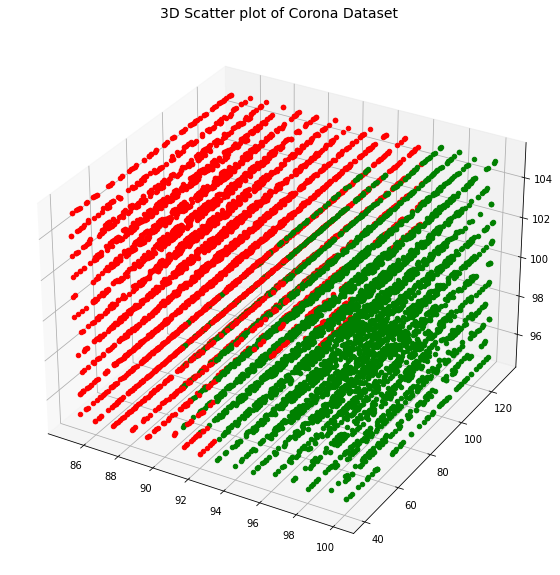

Red --> Corona Positive | Green --> Corona Negative


In [15]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
x_axis = corona_df['Oxygen']
y_axis = corona_df['PulseRate']
z_axis = corona_df['Temperature']
c = x_axis + y_axis

for i in range(len(y)):
    if y[i] == 'Positive':
        ax.scatter(x_axis[i], y_axis[i], z_axis[i], color='red')
    else:
        ax.scatter(x_axis[i], y_axis[i], z_axis[i], color='green')

# syntax for plotting
ax.set_title('3D Scatter plot of Corona Dataset', fontsize=14)
plt.show()

print('Red --> Corona Positive | Green --> Corona Negative')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

print("X_train shape: ", X_train.shape)

print("X_test shape: ", X_test.shape)

print("y_train shape: ", y_train.shape)

print("y_test shape: ", y_test.shape)

X_train shape:  (7000, 3)
X_test shape:  (3000, 3)
y_train shape:  (7000,)
y_test shape:  (3000,)


In [25]:
#importing the necessary package to use the classification algorithm

from sklearn import svm #for Support Vector Machine (SVM) Algorithm

model_svm = svm.SVC() #select the algorithm

model_svm.fit(X_train, y_train) #train the model with the training dataset

y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model

# checking the accuracy of the algorithm.

# by comparing predicted output by the model and the actual output

score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)

print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")

# save the accuracy score

score = set()

score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.9427
----------------------------------


In [26]:
# importing the necessary package to use the classification algorithm

from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

model_dt = DecisionTreeClassifier(random_state=4)

model_dt.fit(X_train, y_train) #train the model with the training dataset

y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output

score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)

print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")

# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 1.0
---------------------------------


In [27]:
# importing the necessary package to use the classification algorithm

from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours

#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm

model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class

model_knn.fit(X_train, y_train) #train the model with the training dataset

y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)

print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")

# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.9813
----------------------------------


In [28]:
# importing the necessary package to use the classification algorithm

from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train) #train the model with the training dataset

y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output

score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)

print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")

# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.9207
---------------------------------


In [29]:
# importing the necessary package to use the classification algorithm

from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(X_train, y_train) #train the model with the training dataset

y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output

score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)

print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")

# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.8863
---------------------------------


In [30]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
    print(s)

The accuracy scores of different Models:
----------------------------------------
('DT', 1.0)
('LR', 0.9207)
('KNN', 0.9813)
('NB', 0.8863)
('SVM', 0.9427)
